# Basic Example of Flat Rolling with PyRoll

In [ ]:
# only for Google Colab
!wget -N "https://raw.githubusercontent.com/Institute-of-Metal-Forming/notebooks-ilsenburg/refs/heads/main/requirements.txt"
!pip install -r "requirements.txt"

Import the core library and a bunch of plugins. We assign `pr` as a shortcut to the PyRolL library to save typing efforts.

In [1]:
import pandas as pd
import plotly.express as px

import pyroll.basic as pr
import pyroll.export as pe

Import additional libraries and make some basic configuration.

In [2]:
import logging
import sys

logging.basicConfig(stream=sys.stdout, format='[%(levelname)s] %(name)s: %(message)s')
logging.getLogger("pyroll").setLevel(logging.INFO) 

## Definition of Initial Workpiece (Profile)

With the following class constructor one defines the state of the workpiece that is fed into the first unit of the rolling sequence.
It holds geometrical values as well as material data.

The example case is a square-shaped profile. The used units are standard SI-Units in every case.

In [3]:
in_profile = pr.Profile.box(
    height=35e-3,
    width=70e-3,
    corner_radius=2e-3,
    temperature=1100 + 273.15,
    strain=0,
    material="C45",
    density=7.5e3,
    specific_heat_capacity=690,
)

You can also plot the profile by using it as follows:

In [4]:
in_profile

BoxProfile(
    classifiers={'box'},
    corner_radius=0.002,
    cross_section=Polygon(
        area=0.002446546193962185,
        height=0.035,
        perimeter=0.20656132462781918,
        width=0.07,
        ),
    density=7500.0,
    material='C45',
    specific_heat_capacity=690,
    strain=0,
    t=0,
    temperature=1373.15,
    )

## Simulating Roll Passes

For simulating a roll pass we have to define the shape of the groove, the properties of the roll and of the pass itself.

The groove can be defined by creating a groove object. Here, the `FlatGroove` class is used to create a flat profile and there are no other parameters needed, except for the `usable_width`.
In this case, we define the roll at the same time. For this we need only one additional property, the nominal radius.

In [5]:
roll1 = pr.Roll(
    groove=pr.FlatGroove(usable_width=250e-3,),
    nominal_radius=300e-3 / 2,
)

The roll can now be used to define the passes. The upper and lower working rolls of the pass are equal, so we need only one.
We add the height of the roll gap and the rolling velocity as additional properties.
For the transports we need to add a duration.
Also, we give a label to the steps for human identification.

In [6]:
sequence = pr.PassSequence([
    pr.RollPass(
        label="Flach Sack I",
        roll=roll1,
        gap=25e-3,
        velocity=0.3,
    ),
    pr.Transport(
        label="I -> II",
        duration = 5,
    ),
    pr.RollPass(
        label="Flach Sack II",
        roll=roll1,
        gap=10e-3,
        velocity=0.3
    ),
    pr.Transport(
        label="II -> III",
        duration = 5,
    ),
    pr.RollPass(
        label="Flach Sack III",
        roll=roll1,
        gap=5e-3,
        velocity=0.3
    ),
])

To actually simulate the roll pass, we use the `solve` method and give the input profile as an argument.
The state of the output profile is returned.

In [7]:
sequence.solve(in_profile)

[INFO] pyroll.core.Unit: Started solving of PassSequence.
[INFO] pyroll.core.Unit: Started solving of TwoRollPass 'Flach Sack I'.
[INFO] pyroll.core.Unit: Started solving of Rotator 'Auto-Rotator for TwoRollPass 'Flach Sack I''.
[INFO] pyroll.core.Unit: Finished solving of Rotator 'Auto-Rotator for TwoRollPass 'Flach Sack I'' after 2 iterations.
[INFO] pyroll.core.Unit: Solution took 0.003 s.
[WARNING] root: No coulomb_friction_coefficient hook found. Continuing with 0.
[WARNING] root: No coulomb_friction_coefficient hook found. Continuing with 0.
[WARNING] root: No coulomb_friction_coefficient hook found. Continuing with 0.
[WARNING] root: No coulomb_friction_coefficient hook found. Continuing with 0.
[WARNING] root: No coulomb_friction_coefficient hook found. Continuing with 0.
[WARNING] root: No coulomb_friction_coefficient hook found. Continuing with 0.
[WARNING] root: No coulomb_friction_coefficient hook found. Continuing with 0.
[WARNING] root: No coulomb_friction_coefficient hoo

Profile(
    classifiers={'flat', 'generic_elongation', 'symmetric'},
    cross_section=Polygon(
        area=0.0004396640778117984,
        height=0.005,
        perimeter=0.18586563112471932,
        width=0.08793281556235967,
        ),
    density=7500.0,
    length=0.0,
    material='C45',
    specific_heat_capacity=690,
    strain=np.float64(0.7807477310067829),
    t=np.float64(10.375049980046402),
    temperature=np.float64(1315.5621677679428),
    )

In [8]:
sequence

PassSequence(
    convergence_history=[{'iteration': 1,
      'residuum': np.float64(nan),
      'label': ''},
     {'iteration': 2,
      'residuum': np.float64(3.832663192485422e-05),
      'label': ''}],
    duration=np.float64(10.375049980046402),
    elongation=5.564580591024423,
    global_iterator=3,
    in_profile=InProfile(
        classifiers={'box'},
        cross_section=Polygon(
            area=0.002446546193962185,
            height=0.035,
            perimeter=0.20656132462781918,
            width=0.07,
            ),
        density=7500.0,
        material='C45',
        specific_heat_capacity=690,
        strain=0,
        t=0,
        temperature=1373.15,
        ),
    iteration_precision=0.001,
    label='',
    log_elongation=np.float64(1.716421616393123),
    max_iteration_count=100,
    out_profile=OutProfile(
        classifiers={'flat', 'generic_elongation', 'symmetric'},
        cross_section=Polygon(
            area=0.0004396640778117984,
            height=0.005,
            perimeter=0.18586563112471932,
            width=0.08793281556235967,
            ),
        density=7500.0,
        length=0.0,
        material='C45',
        specific_heat_capacity=690,
        strain=np.float64(0.7807477310067829),
        t=np.float64(10.375049980046402),
        temperature=np.float64(1315.5621677679428),
        ),
    power=np.float64(97665.17530530356),
    units=[TwoRollPass(
         abs_draught=-0.009950659913745483,
         back_tension=0,
         bite_angle=np.float64(0.25892154200622125),
         classifiers={'flat', 'generic_elongation', 'symmetric'},
         contact_area=np.float64(0.005525757310908386),
         contour_lines=MultiLineString(
             height=0.025,
             length=0.7,
             width=0.35,
             ),
         convergence_history=[{'iteration': 1,
           'residuum': np.float64(nan),
           'label': 'Flach Sack I'},
          {'iteration': 2,
           'residuum': np.float64(704486138678.8093),
           'label': 'Flach Sack I'},
          {'iteration': 3,
           'residuum': np.float64(1.1576421303584972),
           'label': 'Flach Sack I'},
          {'iteration': 4,
           'residuum': np.float64(0.08276359891104569),
           'label': 'Flach Sack I'},
          {'iteration': 5,
           'residuum': np.float64(0.17061690462180368),
           'label': 'Flach Sack I'},
          {'iteration': 6,
           'residuum': np.float64(0.028195151260315396),
           'label': 'Flach Sack I'},
          {'iteration': 7,
           'residuum': np.float64(0.002167412703412757),
           'label': 'Flach Sack I'},
          {'iteration': 8,
           'residuum': np.float64(0.0004596626059558536),
           'label': 'Flach Sack I'},
          {'iteration': 9,
           'residuum': np.float64(7.343481896135192),
           'label': 'Flach Sack I'},
          {'iteration': 10,
           'residuum': np.float64(1.1576421303584972),
           'label': 'Flach Sack I'},
          {'iteration': 11,
           'residuum': np.float64(0.0858269325474521),
           'label': 'Flach Sack I'},
          {'iteration': 12,
           'residuum': np.float64(0.04833479616196857),
           'label': 'Flach Sack I'},
          {'iteration': 13,
           'residuum': np.float64(0.0012099817197127997),
           'label': 'Flach Sack I'},
          {'iteration': 14,
           'residuum': np.float64(0.0007170202054153262),
           'label': 'Flach Sack I'}],
         coulomb_friction_coefficient=0,
         deformation_heat_efficiency=0.95,
         deformation_resistance=np.float64(111423733.18928249),
         disk_element_count=0,
         disk_elements=[],
         displaced_cross_section=MultiPolygon(
             area=0.0006965461939621839,
             height=0.035,
             perimeter=0.2965613246278189,
             width=0.07,
             ),
         draught=0.7152940763263796,
         duration=np.float64(0.12801909579781015),
         e

## Extracting Result Data

Now we use the function `to_pandas()` from the pyroll_export package to get our results into a flat table for a better overview.

In [9]:
df_units = pe.to_pandas(sequence)
df_units

,abs_draught,back_tension,bite_angle,classifiers,contact_area,contour_lines_coords,contour_lines_height,contour_lines_length,contour_lines_width,contour_lines_x,...,volume,wusatowski_exponent,wusatowski_friction_coefficient,wusatowski_material_coefficient,wusatowski_temperature_coefficient,wusatowski_velocity_coefficient,zouhar_contact_c1,zouhar_contact_c2,zouhar_contact_c3,zouhar_contact_in_width
0,-0.009951,0.0,0.258922,"[flat, symmetric, generic_elongation]",0.005526,"[[-0.175, 0.0125], [-0.125, 0.0125], [0.0, 0.0...",0.025,0.7,0.35,"[-0.175, -0.125, 0.0, 0.125, 0.175, nan, 0.175...",...,0.000079,0.170174,1.0,1.0,1.0,0.996912,1.0,0.0,1.0,0.070000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.015000,0.0,0.317560,"[flat, symmetric, generic_elongation]",0.007436,"[[-0.175, 0.005], [-0.125, 0.005], [0.0, 0.005...",0.010,0.7,0.35,"[-0.175, -0.125, 0.0, 0.125, 0.175, nan, 0.175...",...,0.000055,0.119733,1.0,1.0,1.0,1.029478,1.0,0.0,1.0,0.073878
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.005000,0.0,0.182829,"[flat, symmetric, generic_elongation]",0.004713,"[[-0.175, 0.0025], [-0.125, 0.0025], [0.0, 0.0...",0.005,0.7,0.35,"[-0.175, -0.125, 0.0, 0.125, 0.175, nan, 0.175...",...,0.000016,0.023691,1.0,1.0,1.0,1.019149,1.0,0.0,1.0,0.084875


We can use the `roll_passes` attribute for filtering out just the passes.

In [10]:
df_roll_passes = pe.to_pandas(sequence.roll_passes)
df_roll_passes

,abs_draught,back_tension,bite_angle,classifiers,contact_area,contour_lines_coords,contour_lines_height,contour_lines_length,contour_lines_width,contour_lines_x,...,volume,wusatowski_exponent,wusatowski_friction_coefficient,wusatowski_material_coefficient,wusatowski_temperature_coefficient,wusatowski_velocity_coefficient,zouhar_contact_c1,zouhar_contact_c2,zouhar_contact_c3,zouhar_contact_in_width
0,-0.009951,0,0.258922,"[flat, symmetric, generic_elongation]",0.005526,"[[-0.175, 0.0125], [-0.125, 0.0125], [0.0, 0.0...",0.025,0.7,0.35,"[-0.175, -0.125, 0.0, 0.125, 0.175, nan, 0.175...",...,0.000079,0.170174,1,1,1,0.996912,1,0,1,0.070000
1,-0.015000,0,0.317560,"[flat, symmetric, generic_elongation]",0.007436,"[[-0.175, 0.005], [-0.125, 0.005], [0.0, 0.005...",0.010,0.7,0.35,"[-0.175, -0.125, 0.0, 0.125, 0.175, nan, 0.175...",...,0.000055,0.119733,1,1,1,1.029478,1,0,1,0.073878
2,-0.005000,0,0.182829,"[flat, symmetric, generic_elongation]",0.004713,"[[-0.175, 0.0025], [-0.125, 0.0025], [0.0, 0.0...",0.005,0.7,0.35,"[-0.175, -0.125, 0.0, 0.125, 0.175, nan, 0.175...",...,0.000016,0.023691,1,1,1,1.019149,1,0,1,0.084875


We can use the `profiles` attribute to extract all profiles.

In [11]:
df_profiles = pe.to_pandas(sequence.profiles)
df_profiles

,classifiers,cross_section_area,cross_section_coords,cross_section_error,cross_section_filling_ratio,cross_section_height,cross_section_perimeter,cross_section_width,cross_section_x,cross_section_xy,...,technologically_orientated_cross_section_height,technologically_orientated_cross_section_perimeter,technologically_orientated_cross_section_width,technologically_orientated_cross_section_x,technologically_orientated_cross_section_xy,technologically_orientated_cross_section_y,temperature,type,velocity,width
0,[box],0.002447,"[[0.033, -0.0175], [-0.033, -0.0175], [-0.0331...",NaN,NaN,0.035,0.206561,0.070000,"[0.033, -0.033, -0.03319603428065912, -0.03339...","[[0.033, -0.033, -0.03319603428065912, -0.0333...",...,NaN,NaN,NaN,NaN,NaN,NaN,1373.150000,PassSequence.InProfile,NaN,NaN
1,"[box, rotated]",0.002447,"[[0.033, -0.0175], [-0.033, -0.0175], [-0.0331...",NaN,NaN,0.035,0.206561,0.070000,"[0.033, -0.033, -0.03319603428065912, -0.03339...","[[0.033, -0.033, -0.03319603428065912, -0.0333...",...,NaN,NaN,NaN,NaN,NaN,NaN,1373.150000,TwoRollPass.InProfile,0.226478,0.070000
2,"[flat, symmetric, generic_elongation]",0.001847,"[[0.0019392326651488448, -0.0125], [0.0, -0.01...",-0.704486,0.295514,0.025,0.197757,0.073878,"[0.0019392326651488448, 0.0, -0.00193923266514...","[[0.0019392326651488448, 0.0, -0.0019392326651...",...,0.025,0.197757,0.073878,"[0.0019392326651488448, 0.0, -0.00193923266514...","[[0.0019392326651488448, 0.0, -0.0019392326651...","[-0.0125, -0.0125, -0.0125, -0.0125, 0.0125, 0...",1369.262127,TwoRollPass.OutProfile,0.300000,0.073878
3,"[flat, symmetric, generic_elongation]",0.001847,"[[0.0019392326651488448, -0.0125], [0.0, -0.01...",-0.704486,0.295514,0.025,0.197757,0.073878,"[0.0019392326651488448, 0.0, -0.00193923266514...","[[0.0019392326651488448, 0.0, -0.0019392326651...",...,0.025,0.197757,0.073878,"[0.0019392326651488448, 0.0, -0.00193923266514...","[[0.0019392326651488448, 0.0, -0.0019392326651...","[-0.0125, -0.0125, -0.0125, -0.0125, 0.0125, 0...",1369.262127,Transport.InProfile,0.300000,NaN
4,"[flat, symmetric, generic_elongation]",0.001847,"[[0.0019392326651488448, -0.0125], [0.0, -0.01...",-0.704486,0.295514,0.025,0.197757,0.073878,"[0.0019392326651488448, 0.0, -0.00193923266514...","[[0.0019392326651488448, 0.0, -0.0019392326651...",...,0.025,0.197757,0.073878,"[0.0019392326651488448, 0.0, -0.00193923266514...","[[0.0019392326651488448, 0.0, -0.0019392326651...","[-0.0125, -0.0125, -0.0125, -0.0125, 0.0125, 0...",1351.566530,Transport.OutProfile,0.300000,NaN
5,"[rotated, flat, symmetric, generic_elongation]",0.001847,"[[0.0019392326651488448, -0.0125], [0.0, -0.01...",-0.704486,0.295514,0.025,0.197757,0.073878,"[0.0019392326651488448, 0.0, -0.00193923266514...","[[0.0019392326651488448, 0.0, -0.0019392326651...",...,0.025,0.197757,0.073878,"[0.0019392326651488448, 0.0, -0.00193923266514...","[[0.0019392326651488448, 0.0, -0.0019392326651...","[-0.0125, -0.0125, -0.0125, -0.0125, 0.0125, 0...",1351.566530,TwoRollPass.InProfile,0.137862,0.073878
6,"[flat, symmetric, generic_elongation]",0.000849,"[[0.005498433820176396, -0.005], [0.0, -0.005]...",-0.660499,0.339501,0.010,0.189751,0.084875,"[0.005498433820176396, 0.0, -0.005498433820176...","[[0.005498433820176396, 0.0, -0.00549843382017...",...,0.010,0.189751,0.084875,"[0.005498433820176396, 0.0, -0.005498433820176...","[[0.005498433820176396, 0.0, -0.00549843382017...","[-0.005, -0.005, -0.005, -0.005, 0.005, 0.005,...",1351.984676,TwoRollPass.OutProfile,0.300000,0.084875
7,"[flat, symmetric, generic_elongation]",0.000849,"[[0.005498433820176396, -0.005], [0.0, -0.005]...",-0.660499,0.339501,0.010,0.189751,0.084875,"[0.005498433820176396, 0.0, -0.005498433820176...","[[0.005498433820176396, 0.0, -0.00549843382017...",...,0.010,0.189751,0.084875,"[0.005498433820176396, 0.0, -0.005498433820176...","[[0.005498433820176396, 0.0, -0.00549843382017...","[-0.005, -0.005, -0.005, -0.005, 0.005, 0.005,...",1351.984676,Transport.InProfile,0.300000,NaN
8,"[flat, 

## Plotting the Results

Now we can use these tablse with the plotting package `plotly` to show our results in diagrams. We give the data source (the table) and the headers of the columns to display at the respective axes.

### Temperature Evolution over Time

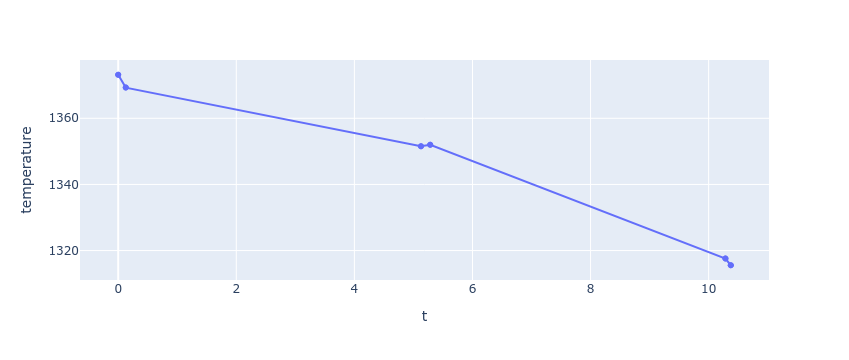

In [12]:
px.line(df_profiles, x="t", y="temperature", markers=True)

### Roll Forces of Each Pass

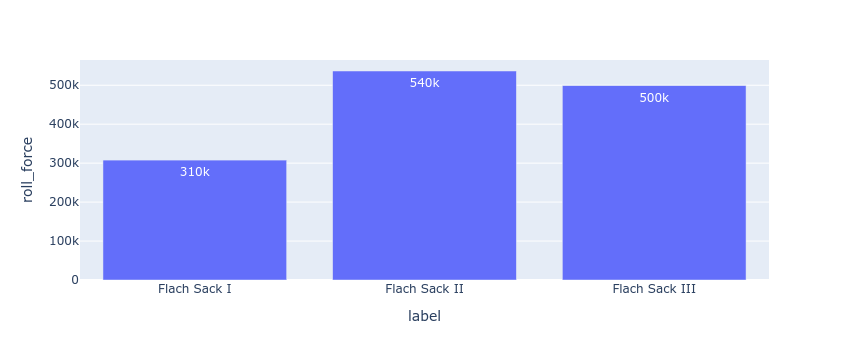

In [13]:
px.bar(df_roll_passes, x="label", y="roll_force", text_auto=".2s")